In [38]:
import numpy as np
import imageio
from scipy.fftpack import fftn, ifftn, fftshift
import matplotlib.pyplot as plt

In [3]:
filename = str(input()).rstrip()
k = int(input())
sigma = float(input())
gamma =  float(input())

case_b1_n.png
3
0.6
0.001


In [160]:
input_image =  imageio.imread('../images_sa2/'+filename)

In [161]:
def gaussian_filter(k=3, sigma=1.0):
   arx = np.arange((-k // 2) + 1.0, (k // 2) + 1.0)
   x, y = np.meshgrid(arx, arx)
   filt = np.exp( -(1/2)*(np.square(x) + np.square(y))/np.square(sigma) )
   return filt/np.sum(filt)

## Denoising the Image

In [162]:
input_image

Array([[230, 255, 234, ..., 255, 255, 239],
       [239, 251, 246, ..., 240, 249, 239],
       [243, 247, 251, ..., 246, 219, 255],
       ...,
       [236, 255, 253, ..., 255, 250, 243],
       [255, 232, 228, ..., 251, 249, 246],
       [255, 253, 254, ..., 245, 240, 239]], dtype=uint8)

In [163]:
def denoise_gaussian(input_image, k, sigma):
   
    gaussian = gaussian_filter(k, sigma)
    pad1 = (input_image.shape[0]//2)-gaussian.shape[0]//2
    gaussian_padded = np.pad(gaussian, (pad1,pad1-1), "constant",  constant_values=0)
    
    max_g = np.amax(input_image)
    
    FFT_input_image = fftn(input_image)
    FFT_gaussian =  fftn(gaussian_padded)
    
    G = np.multiply(FFT_input_image, FFT_gaussian)
    r = np.real(fftshift(ifftn(G)))
    r = (r - np.min(r)) * max_g / (np.max(r) - np.min(r))
    
    return r

In [164]:
denoised_image =  denoise_gaussian(input_image, k, sigma)

(-0.5, 127.5, 127.5, -0.5)

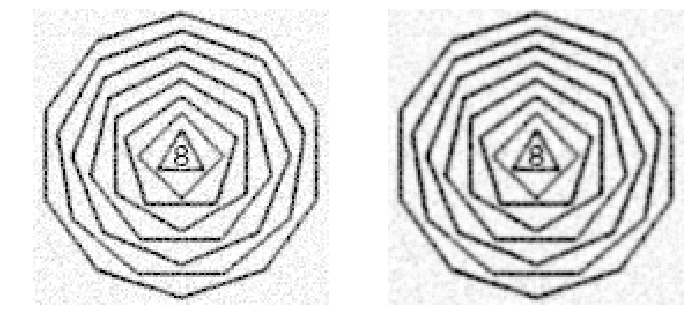

In [165]:
plt.figure(figsize=(18,6))
plt.subplot(131)
plt.imshow(input_image, cmap="gray", vmin=0, vmax=255); plt.axis('off')
plt.subplot(132)
plt.imshow(denoised_image, cmap="gray"); plt.axis('off')

## Deblurring the Image

In [166]:
def CLSF(input_image, k, sigma, gamma):
    gaussian = gaussian_filter(k, sigma)
    pad1 = (input_image.shape[0]//2)-gaussian.shape[0]//2
    gaussian_padded = np.pad(gaussian, (pad1,pad1-1), "constant",  constant_values=0)
    
    max_d =  np.amax(input_image)
    
    laplacian =  np.array([[ 0, -1, 0], [-1, 4, -1], [0, -1, 0]])
    pad1 = (input_image.shape[0]//2)-laplacian.shape[0]//2
    laplacian_padded = np.pad(laplacian, (pad1,pad1-1), "constant",  constant_values=0)
    
    FFT_denoised_image = fftn(denoised_image)
    FFT_gaussian =  fftn(gaussian_padded)
    FFT_laplacian = fftn(laplacian_padded)
    
    f = np.divide(FFT_gaussian.conjugate(), 
                  (np.abs(FFT_gaussian)**2 + gamma*np.abs(FFT_laplacian)**2 )) * FFT_denoised_image
    
    r = np.real(fftshift(ifftn(f)))
    deblurred_image = (r - np.min(r)) * max_g / (np.max(r) - np.min(r))
    
    return deblurred_image

In [167]:
deblurred_image =  CLSF(denoised_image, k, sigma, gamma)

(-0.5, 127.5, 127.5, -0.5)

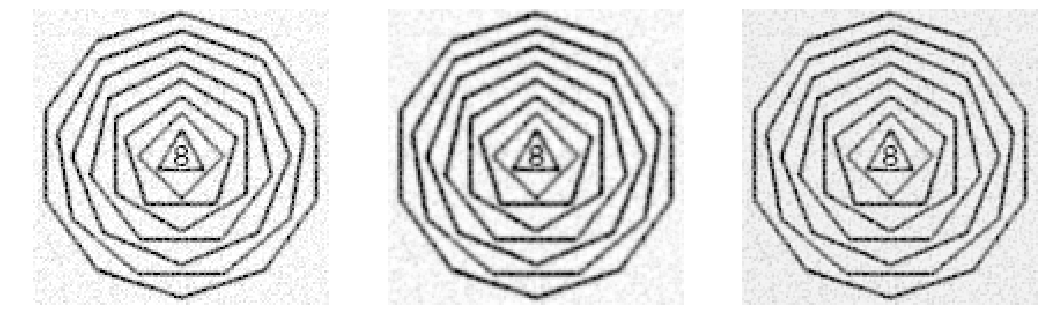

In [168]:
plt.figure(figsize=(18,6))
plt.subplot(131)
plt.imshow(input_image, cmap="gray", vmin=0, vmax=255); plt.axis('off')
plt.subplot(132)
plt.imshow(denoised_image, cmap="gray"); plt.axis('off')
plt.subplot(133)
plt.imshow(deblurred_image, cmap="gray"); plt.axis('off')

In [170]:
std =  np.std(deblurred_image[:])
print("{:.1f}".format(std))

52.7
